## Define the goals

we have to focus the **BADIR** perspective; 

* **B** *usiness question*
    - What is the stated business question?
    - What is the intent underlying the question (e.g., what is the context, what is the impacted segment, and what are stakeholders’ current thoughts about the underlying reasons?
    - What business considerations (e.g., stakeholders, timeline, and cost) are likely to impact the analysis?

* **A** *nalysis plan*
    - What is the analysis goal?
    - What hypotheses are to be tested?
    - What data is required/available to test the hypotheses?
    - What methodology(-ies) will you employ?
    - What is the project plan (timeline and milestones, risks, phasing, prioritization, …)?

* **D** *ata collection*
    - From where can the data be obtained?
    - How must the data be cleansed and validated?

* **I** *nsights*
    - What patterns do you see in the data?
    - Are each of the hypotheses proven or disproven?
    - How much confidence should stakeholders place in the results?
    - How do you rank your findings in terms of quantified impact on the business?

* **R** *ecommendation*
    - How can you most effectively present the results of your analysis to your stakeholders (in terms they can understand and in alignment with information they’ll value)?
    - Note: A generic template for a recommendation presentation or report might include:
    - Objective: Background (optional), Scope (optional), Approach (optional), Recommendations, Key insights with impact, Next steps

In [7]:
# import libraries
import math
import numpy as pn
from scipy import stats

In [8]:
temp = math.sqrt(25)

In [9]:
temp = np.random.rand(5,5)

In [10]:
temp_mean = np.mean(temp)

In [13]:
np.mean(temp_mean)

0.5673006967134968

In [14]:
temp = 25
type(temp)

int

In [15]:
temp = 25.0
type(temp)

float

In [16]:
listOne = [1, 2, 3, 4]
listOne[1:3]

[2, 3]

In [17]:
# dictionary creation
tel = {"jack": 4098, 
       "sape": 4139}
tel["jack"]

4098

## Prepare and explore the data

Problem:
1. Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
2. Revenue and customer loss for clients and, eventually, loss of clients for Credit One

Investigative Questions:
1. How do you ensure that customers can/will pay their loans? Can we do this?

As you progress through the tasks at hand begin thinking about how to solve this problem. Here are some lessons we learned form a similar problem we addressed last year:
1. We cannot control customer spending habits
2. We cannot always go from what we find in our analysis to the underlying "why"
3. We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
4. What concrete information can we derive from the data we have?
5. What proven methods can we use to uncover more information and why?

In [18]:
# import libraries to use
import pandas as pd

### Import the data we are going to explore

In [19]:
wd_path = "C:/Users/romcl/OneDrive/Documents/UbiqumCodeAcademy/projects/python_creditAnalysis/"
data = pd.read_csv(wd_path + "data/default of credit card clients.csv", header = 1)

In [20]:
# understand the shape of the data
data.shape

(30000, 25)

In [21]:
# look for the column names
data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [22]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [23]:
# find the data types of information
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

We will have to make changes to our data to adapt it to the right format:
* Transform to characters *sex, marriage and education*

Steps to follow to clean the data: 
* Data cleaning
* Data transformation
    - How to deal with missing values?
* Data reduction
* Data discretization
* Text cleaning (if needed)

### Data cleaning

We will use pandas library to perform this task

In [24]:
import pandas as pd

We can use functions like `pd.notnull(data)` or `pd.isnull(data)` to find missing values

In [25]:
# podemos sumar los TRUE en python para detectar el número total de missing values
pd.isnull(data).values.ravel().sum()

0

There is no missing values. So we can skip to use functions like: 
* `data.dropna(axis=0, how = "all")`, to take out all NAs, or you can specify other options in its parameters

### Data visualization

Exploratory Data Analysis (EDA) is basic to be able to get insights from the data: 
* Visualization and Statistics about each variable - you've already done part of this with describe(). 
* Scatter plots comparing the relationships between any two variables
* If needed, visualizing the relationship between many (more than 2) variables
* Checking for collinearity or performing dimensionality reduction 

In [26]:
# we are going to use matplotlib library
import matplotlib.pyplot as plt

In [27]:
header = data.columns.values
header

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

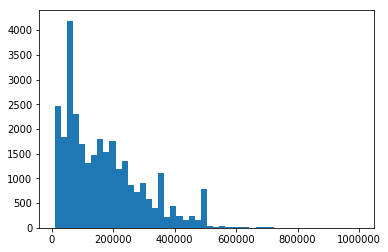

In [31]:
plt.hist(data["LIMIT_BAL"], bins= 50)
plt.show()

Now is time to keep on plotting each variable and also to look for relation between variables. 
* Create distributions for each variable 
* find how to plot relations between variables

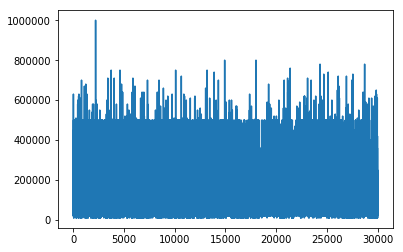

In [34]:
# time to do some line charts
plt.plot(data["LIMIT_BAL"])
plt.show()

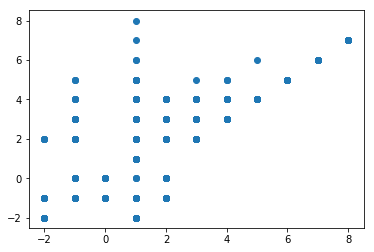

In [36]:
# time for some scatter plots
x = data["PAY_0"]
y = data["PAY_2"]
plt.scatter(x, y)
plt.show()

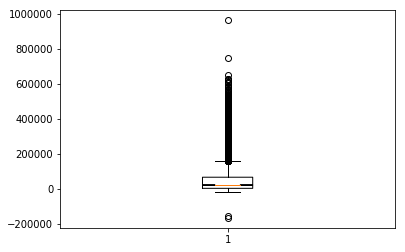

In [38]:
# boxplot to show information 
rel_var = data["BILL_AMT1"]
plt.boxplot(rel_var, "gD")
plt.show()

### Correlation


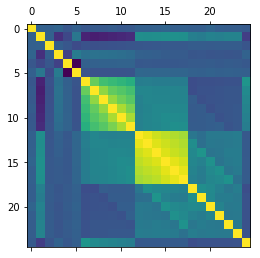

In [43]:
corrMat = data.corr()
plt.matshow(corrMat)
plt.show()

In [42]:
covMat = data.cov()
covMat

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,7.500250e+07,2.941664e+07,78.356379,268.154338,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,...,2.248126e+07,8.795803e+06,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05,-50.151705
LIMIT_BAL,2.941664e+07,1.683446e+10,1571.050630,-22474.028945,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,...,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,-8267.551759
SEX,7.835638e+01,1.571051e+03,0.239247,0.005502,-0.008014,-0.409726,-0.031685,-0.041442,-0.038694,-0.034411,...,-6.884896e+02,-5.056943e+02,-4.874302e+02,-1.964266e+00,-1.567550e+01,-7.403481e+01,-1.708011e+01,-1.245881e+01,-2.405188e+01,-0.008113
EDUCATION,2.681543e+02,-2.247403e+04,0.005502,0.624651,-0.059184,1.275380,0.093584,0.115025,0.107861,0.100528,...,-2.294883e+01,-3.635777e+02,-4.282742e+02,-4.903302e+02,-5.470050e+02,-5.558343e+02,-4.732070e+02,-4.873359e+02,-5.226734e+02,0.009187
MARRIAGE,-1.314525e+02,-7.323670e+03,-0.008014,-0.059184,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,...,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,-0.005273
AGE,1.491057e+03,1.730767e+05,-0.409726,1.275380,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,...,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,0.053143
PAY_0,-2.975726e+02,-3.954593e+04,-0.031685,0.093584,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,...,1.295025e+04,1.234167e+04,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,0.151499
PAY_2,-1.162770e+02,-4.603765e+04,-0.041442,0.115025,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,...,1.711630e+04,1.611095e+04,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,0.130960
PAY_3,-1.916922e+02,-4.443225e+04,-0.038694,0.107861,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,...,1.749410e+04,1.638295e+04,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,0.116867
PAY_4,-2.769132e+01,-4.057181e+04,-0.034411,0.100528,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,...,1.849642e+04,1.726555e+04,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,0.105115


## Build and evaluate the models

In this task you’ll build your models just as you have done previously, but with a different set of tools. As you progress remember the following:

1. Let the data tell the story – don't make any assumptions.
2. It is often best to build three or more models and compare the results.
3. Make sure you have chosen the correct tools for the type of data you have.

I suggest you start this task with a quick orientation on Sci-Kit Learn to become familiar with the benefits of using it and how to use it effectively for this project. 